# Importing Libraries

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset

In [2]:
data = pd.read_csv('Twitter_Data.csv')

# Handle missing values by dropping rows with any missing values

In [3]:
data = data.dropna()

# Define a text cleaning function

In [4]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

Apply the cleaning function to the 'clean_text' column

In [5]:
data['clean_text'] = data['clean_text'].apply(clean_text)


# Plot the distribution of sentiment labels

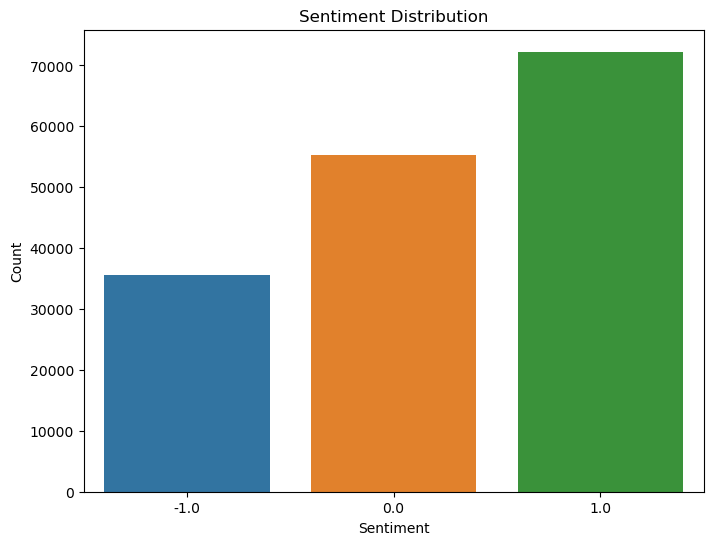

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


# Generate word clouds for each sentiment category

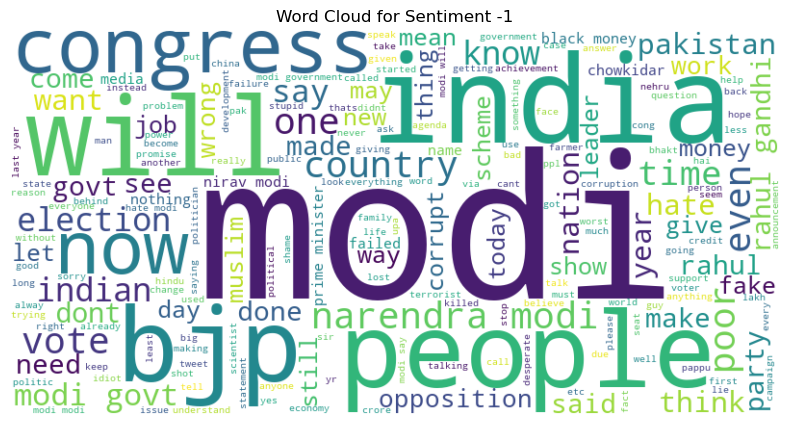

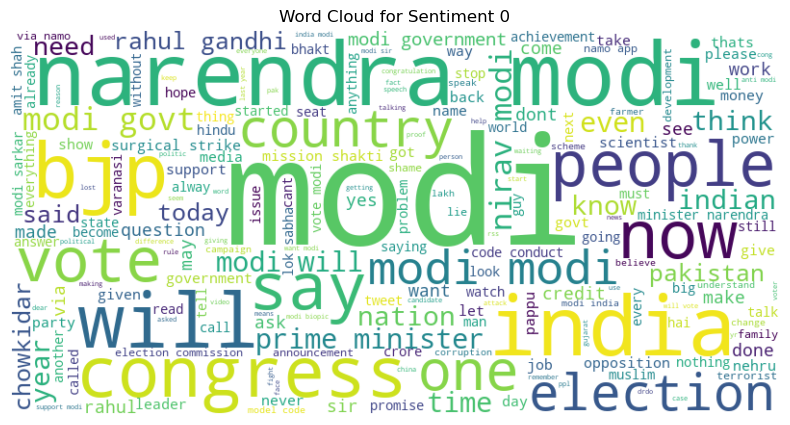

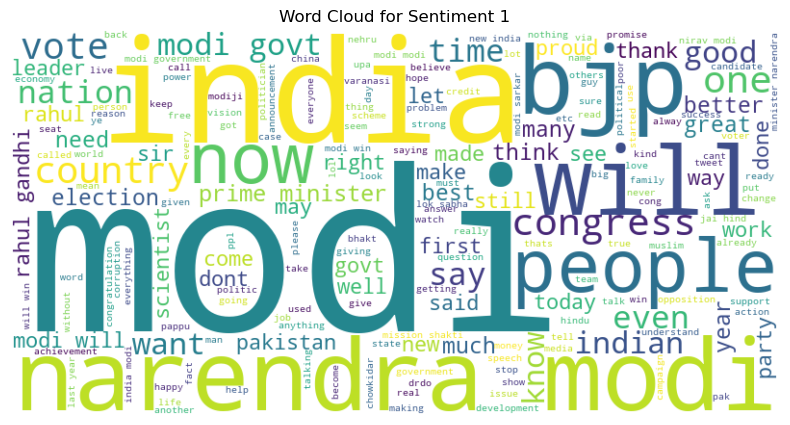

In [7]:
for sentiment in [-1, 0, 1]:
    subset = data[data['category'] == sentiment]
    text = ' '.join(subset['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentiment {sentiment}')
    plt.axis('off')
    plt.show()

# Define the TF-IDF vectorizer

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

Apply the vectorizer to the 'clean_text' column

In [9]:
X = tfidf_vectorizer.fit_transform(data['clean_text'])

Get the target variable

In [10]:
y = data['category']


# Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Multinomial Naive Bayes classifier

In [12]:
nb_classifier = MultinomialNB()


Train the classifier on the training data

In [13]:
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Make predictions on the testing data

In [14]:
y_pred_nb = nb_classifier.predict(X_test)


Evaluate the model's performance

In [15]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)

In [16]:
print(f'Naive Bayes Accuracy: {nb_accuracy}')
print(f'Classification Report:\n{nb_classification_report}')

Naive Bayes Accuracy: 0.7102227403816653
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.91      0.34      0.49      7152
         0.0       0.78      0.69      0.73     11067
         1.0       0.65      0.91      0.76     14375

    accuracy                           0.71     32594
   macro avg       0.78      0.65      0.66     32594
weighted avg       0.75      0.71      0.69     32594



Plot the confusion matrix

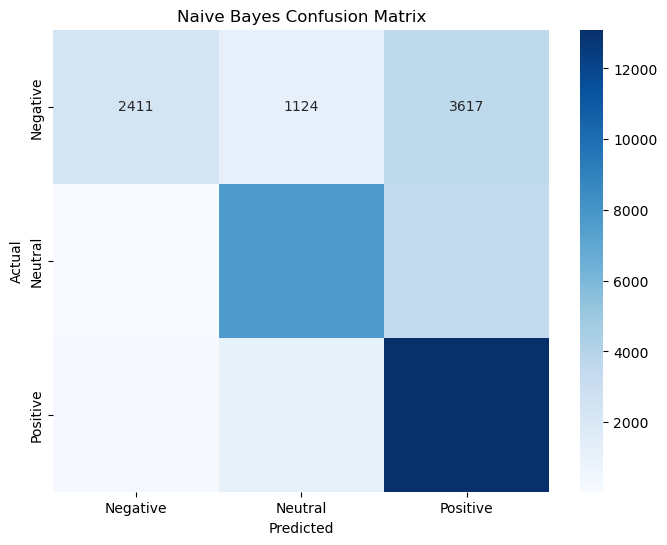

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Initialize the Support Vector Machine classifier

In [18]:
svm_classifier = SVC()


Train the classifier on the training data

In [19]:
svm_classifier.fit(X_train, y_train)


SVC()

Make predictions on the testing data

In [20]:
y_pred_svm = svm_classifier.predict(X_test)


Evaluate the model's performance

In [21]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)
svm_confusion_matrix = confusion_matrix(y_test, y_pred_svm)


In [22]:
print(f'SVM Accuracy: {svm_accuracy}')
print(f'Classification Report:\n{svm_classification_report}')

SVM Accuracy: 0.8436828864208137
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.63      0.73      7152
         0.0       0.77      0.98      0.86     11067
         1.0       0.91      0.84      0.88     14375

    accuracy                           0.84     32594
   macro avg       0.85      0.82      0.82     32594
weighted avg       0.85      0.84      0.84     32594



Plot the confusion matrix

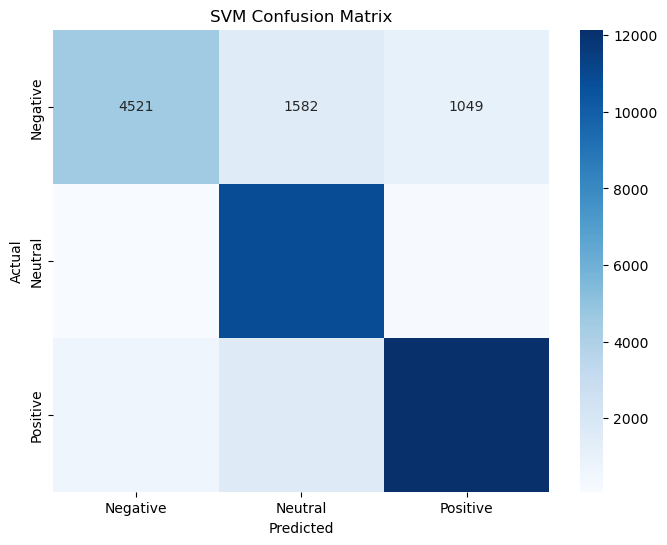

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Initialize the Logistic Regression classifier

In [24]:
lr_classifier = LogisticRegression(max_iter=1000)

Train the classifier on the training data

In [25]:
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Make predictions on the testing data

In [26]:
y_pred_lr = lr_classifier.predict(X_test)

Evaluate the model's performance

In [27]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_classification_report = classification_report(y_test, y_pred_lr)
lr_confusion_matrix = confusion_matrix(y_test, y_pred_lr)

In [28]:
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print(f'Classification Report:\n{lr_classification_report}')

Logistic Regression Accuracy: 0.838559244032644
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.63      0.72      7152
         0.0       0.77      0.97      0.86     11067
         1.0       0.90      0.84      0.87     14375

    accuracy                           0.84     32594
   macro avg       0.84      0.81      0.82     32594
weighted avg       0.85      0.84      0.83     32594



Plot the confusion matrix

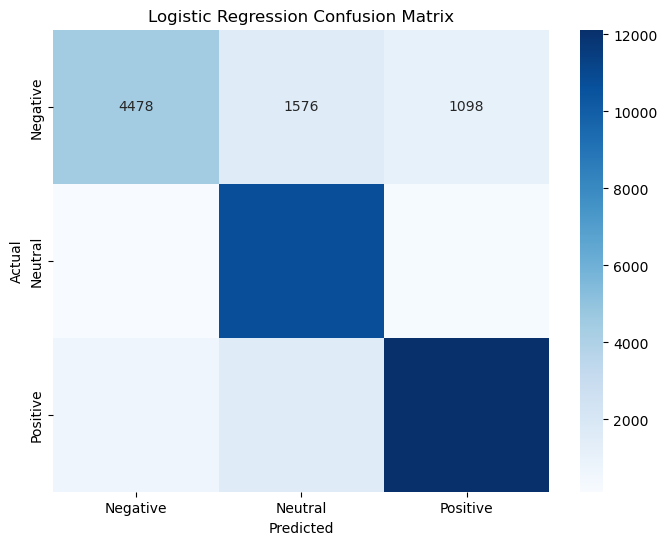

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()